In [60]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
import matplotlib.pyplot as plt
import io
from PIL import Image
from google.colab import files


##1. Import Data

In [61]:
def load_images(directory):
  images =[]
  for filename in os.listdir(directory):
    img = Image.open(os.path.join(directory, filename))
    img = img.resize((224,224))
    img = img.convert('RGB')
    img = np.array(img)/255.0
    images.append(img)
  return images

In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
tumor_images = load_images('/content/drive/My Drive/dataset_tumorotak/yes')
no_tumor_images = load_images('/content/drive/My Drive/dataset_tumorotak/no')

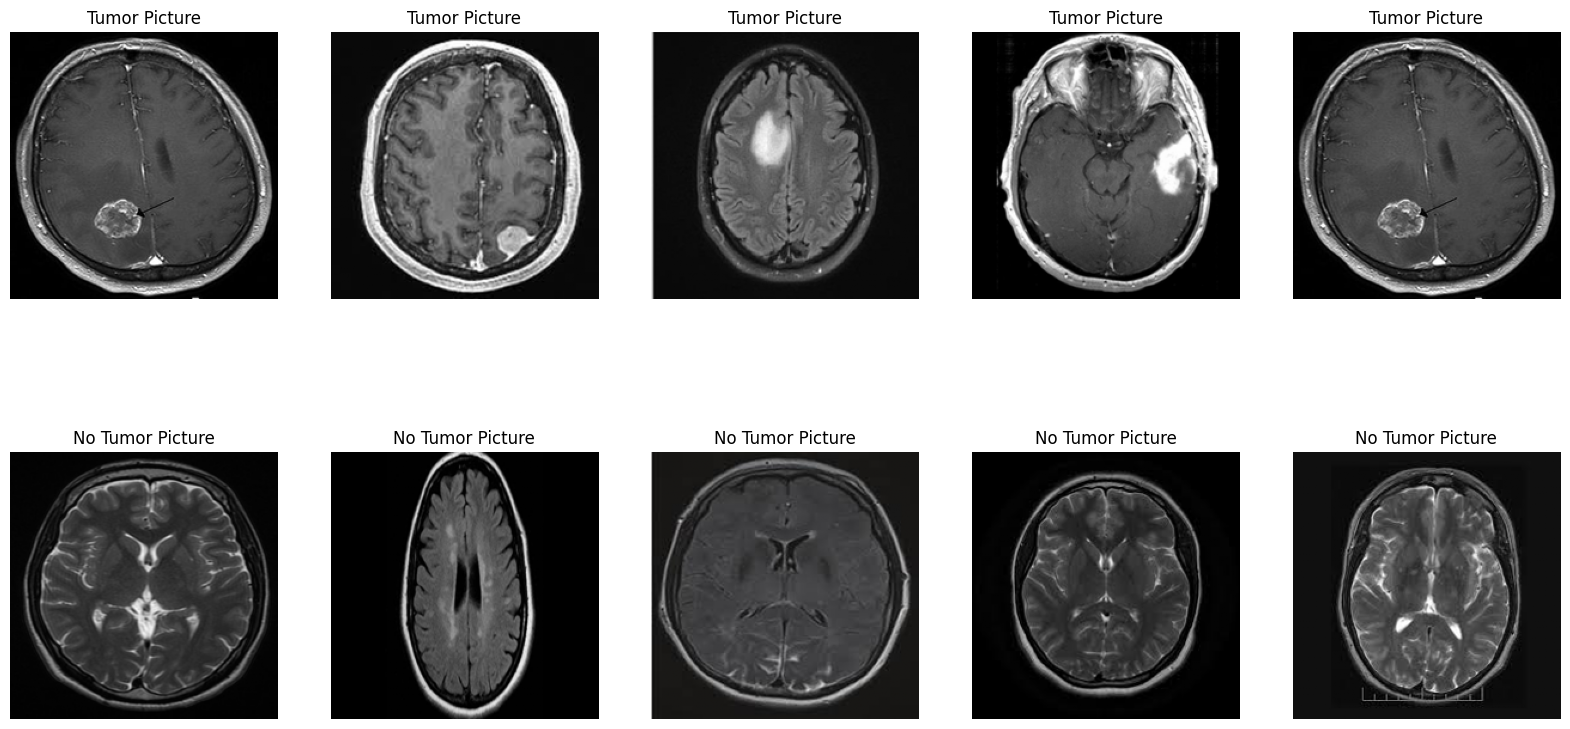

In [41]:
fig, axes = plt.subplots(2, 5, figsize=(20,10))

for i in range(5):
  axes[0, i].imshow(tumor_images[i])
  axes[0, i].set_title('Tumor Picture')
  axes[0, i].axis('off')

for i in range(5):
  axes[1, i].imshow(no_tumor_images[i])
  axes[1, i].set_title('No Tumor Picture')
  axes[1, i].axis('off')

plt.show()

In [ ]:
type(tumor_images)

list

In [ ]:
len(tumor_images)

155

In [ ]:
len(no_tumor_images)

98

##2. Labeling

In [42]:
def assign_labels(tumor_images, no_tumor_images):
  tumor_labels = np.ones(len(tumor_images))
  no_tumor_labels = np.zeros(len(no_tumor_images))
  return tumor_labels, no_tumor_labels
tumor_labels, no_tumor_labels = assign_labels(tumor_images, no_tumor_images)

In [ ]:
tumor_labels

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1.])

In [ ]:
no_tumor_labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
type(tumor_labels)

numpy.ndarray

In [17]:
data = tumor_images + no_tumor_images
labels = np.concatenate((tumor_labels, no_tumor_labels), axis=0)

In [ ]:
labels

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [44]:
type(labels)

numpy.ndarray

In [ ]:
data[0].shape

(224, 224, 3)

##3. Spliting Data


In [43]:
X = np.array(data)
y = np.array(labels)

In [46]:
type(X)

numpy.ndarray

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [20]:
train = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test = tf.data.Dataset.from_tensor_slices((X_test, y_test))


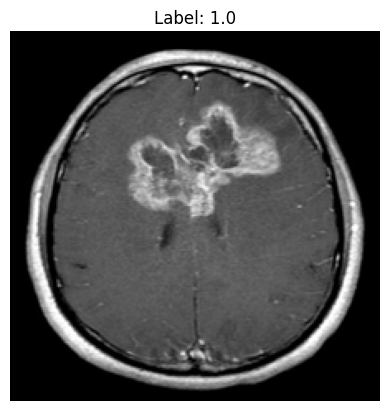

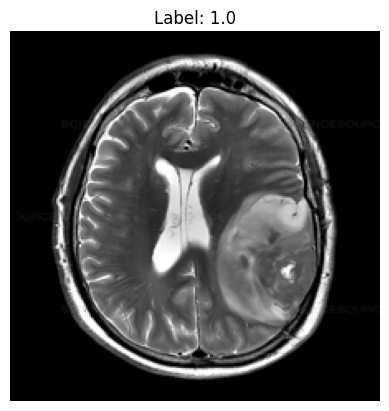

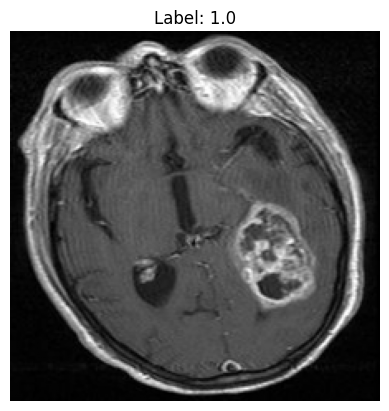

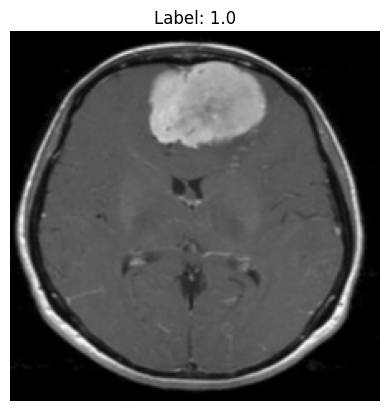

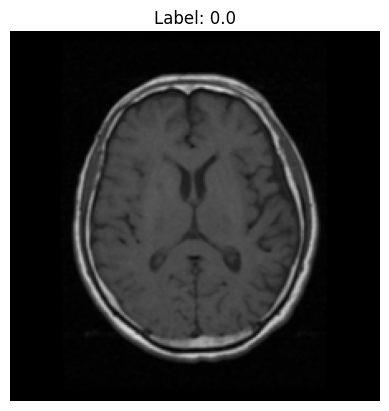

In [21]:
for image, label in train.take(5):
  plt.figure()
  plt.imshow(image.numpy()) #Mengonversi tensor ke array NumPy
  plt.title('Label: {}'.format(label.numpy()))
  plt.axis('off')
  plt.show()

In [55]:
validation_size = int(0.1 * 202)
train = train.skip(validation_size)
val = train.take(validation_size)

In [23]:
BATCH_SIZE = 32
train = train.batch(BATCH_SIZE)
test = test.batch(BATCH_SIZE)
val = val.batch(BATCH_SIZE)

##4. Training Data

In [24]:
model = Sequential()

model.add(Conv2D(32, (3,3),activation = 'relu', input_shape = (224,224,3), padding='valid'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.compile(optimizer='adam',
              loss ='binary_crossentropy',
              metrics=['accuracy'])

In [26]:
history = model.fit(train, validation_data = val, epochs = 10, verbose = 1)

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step - accuracy: 0.4973 - loss: 7.0469 - val_accuracy: 0.7000 - val_loss: 0.8172
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - accuracy: 0.6973 - loss: 1.7271 - val_accuracy: 0.9500 - val_loss: 0.1647
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step - accuracy: 0.8500 - loss: 0.5581 - val_accuracy: 0.8500 - val_loss: 0.3273
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.8187 - loss: 0.5375 - val_accuracy: 0.9500 - val_loss: 0.1452
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 43s 4s/step - accuracy: 0.8973 - loss: 0.2628 - val_accuracy: 1.0000 - val_loss: 0.0848
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 42s 4s/step - accuracy: 0.9754 - loss: 0.1592 - val_accuracy: 1.0000 - val_loss: 0.0579
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - accuracy: 0.9802 - loss: 0.0953 - val_accuracy: 1.0000 - val_loss: 0.0229
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 26s 4s/step - accuracy: 0.9852 - loss: 0.0522 - val_accuracy: 1.0000 - val_loss: 0.0057
Epoch 9/

In [27]:
evaluation = model.evaluate(test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 359ms/step - accuracy: 0.8068 - loss: 0.6902


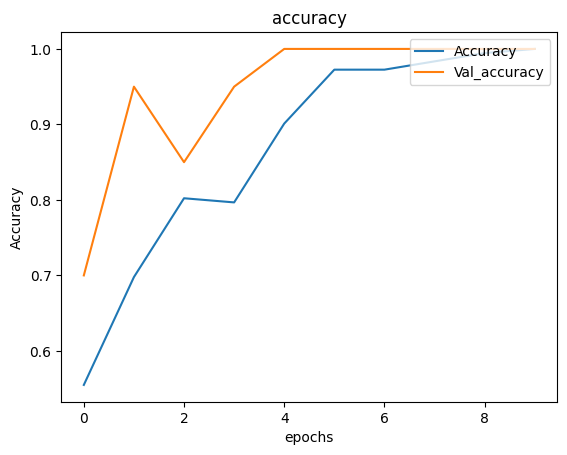

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Accuracy','Val_accuracy'], loc='upper right')
plt.title('accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.show()

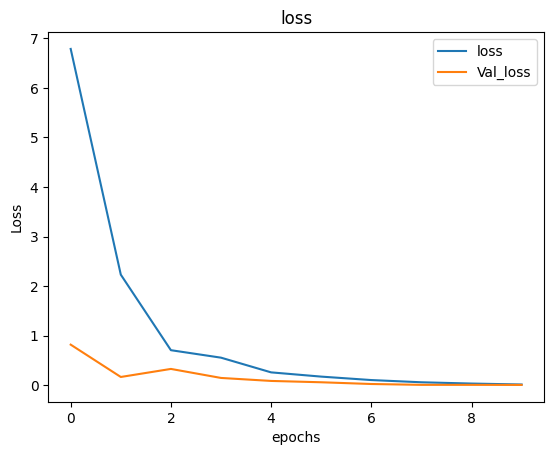

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','Val_loss'], loc='upper right')
plt.title('loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()

##5. Testing

In [30]:
def load_uploaded_image(image_bytes):
  img = Image.open(io.BytesIO(image_bytes))
  img = img.resize((224,224))
  img_array = np.array(img)
  img_array = img_array /255.0
  return img_array

def predict_image(image_bytes):
  img_array = load_uploaded_image(image_bytes)
  img_array = np.expand_dims(img_array, axis=0)
  prediction = model.predict(img_array)
  if prediction[0][0] > 0.5:
    return "Tumor detected"
  else :
    return "No tumor detected"

Saving 5 no.jpg to 5 no.jpg


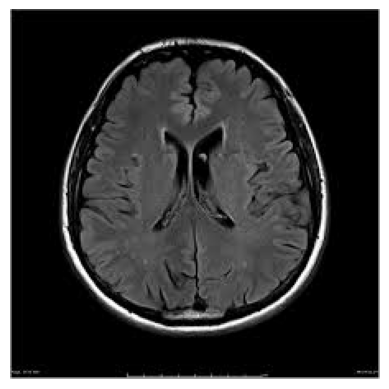

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
No tumor detected


In [33]:
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
image_bytes = uploaded[file_name]
img = Image.open(io.BytesIO(image_bytes))

plt.imshow(img)
plt.axis('off')
plt.show()

result = predict_image(image_bytes)
print(result)